# Linear regression in sklearn 

### In this project, my task will be to implement a machine learning algorithm to predict the size of household electricity bills and to predict the size of electricity bills for new subscribers. 

The dataframe contains information about the amount of electricity bills (amount_paid) and the factors that influence it.
Columns:  
1. number of rooms  
2. number of residents  
3. area of the dwelling  
4. availability of air conditioning  
5. the presence of a TV  
6. type of accommodation: apartment/private house  
7. monthly income  
8. number of children  
9. location: city/rural area  
10. electricity bill

In [1]:
#import the necessary libraries
%pip install seaborn
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# charts are embedded in a notebook 
%matplotlib inline

# disable Anaconda alerts
import warnings
warnings.simplefilter('ignore')

### 1. Let's look at the dataset: .head (), .info (), .dtypes, .describe ()

In [2]:
# Read the file with the initial data into the dataframe df
electricity = pd.read_csv('Var_5.csv')
electricity.head()

,Unnamed: 0,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,0,3,3,742.57,1,1,1,9675.93,2,urban,560.481447
1,1,1,5,952.99,0,1,0,35064.79,1,rural,633.283679
2,2,3,1,761.44,1,1,1,22292.44,0,urban,511.879157
3,3,0,5,861.32,1,1,0,12139.08,0,urban,332.992035
4,4,1,8,731.61,0,1,0,17230.10,2,rural,658.285625


In [3]:
# Use .info ()
electricity.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   num_rooms           1000 non-null   int64  
 2   num_people          1000 non-null   int64  
 3   housearea           1000 non-null   float64
 4   is_ac               1000 non-null   int64  
 5   is_tv               1000 non-null   int64  
 6   is_flat             1000 non-null   int64  
 7   ave_monthly_income  1000 non-null   float64
 8   num_children        1000 non-null   int64  
 9   is_urban            1000 non-null   object 
 10  amount_paid         1000 non-null   float64
dtypes: float64(3), int64(7), object(1)
memory usage: 82.1+ KB


We can see that there are no missing values. There is one categorical change. 

In [4]:
# Use .describe ()
electricity.describe ()

,Unnamed: 0,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,amount_paid
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,1.962000,4.897000,794.703420,0.376000,0.798000,0.477000,24684.986550,1.078000,600.396359
std,288.819436,1.030348,2.007591,147.771736,0.484622,0.401693,0.499721,9678.228224,0.934232,181.406210
min,0.000000,-1.000000,-1.000000,244.400000,0.000000,0.000000,0.000000,-1576.440000,0.000000,87.851850
25%,249.750000,1.000000,4.000000,691.037500,0.000000,1.000000,0.000000,18036.762500,0.000000,475.065141
50%,499.500000,2.000000,5.000000,789.970000,0.000000,1.000000,0.000000,24742.575000,1.000000,598.331726
75%,749.250000,3.000000,6.000000,892.955000,1.000000,1.000000,1.000000,31402.357500,2.000000,729.930489
max,999.000000,5.000000,11.000000,1189.120000,1.000000,1.000000,1.000000,56531.080000,4.000000,1102.994109


You may notice that some columns have negative values (num_rooms, num_people, ave_monthly_income). We can assume that this is erroneous data.

### 2. If necessary, clean up the missing values: fillna(), dropna()

There are no missing values. However, we can delete the Unnamed: 0 column, because it duplicates the indexes and is unnecessary. Also, as we have already learned, several columns have negative values, although logically they should not (there can be no negative number of rooms, residents, or income level), so we will delete them as false values:

In [5]:
# Delete the first column:
electricity.drop(["Unnamed: 0"], axis=1, inplace=True)

# Delete rows with negative values
electricity = electricity[(electricity['num_rooms'] >= 0) & (electricity['num_people'] >= 0) & (electricity['ave_monthly_income'] >= 0)].dropna()

### 3. To better understand the data, we will conduct visual and exploratory data analysis

To better understand the data, let's take the following steps:
1. Create a box-and-whisker plot to better analyse atypical data
2. Split several columns
3. Find correlations between columns and build a heat map of correlations
4. Analyse the impact of several factors on amount_paid using visualisation 

We are most interested in the amount_paid indicator, because in the future it will become the dependent variable in the construction of a linear regression. Therefore, let's focus on analysing the interaction of this particular indicator with others.

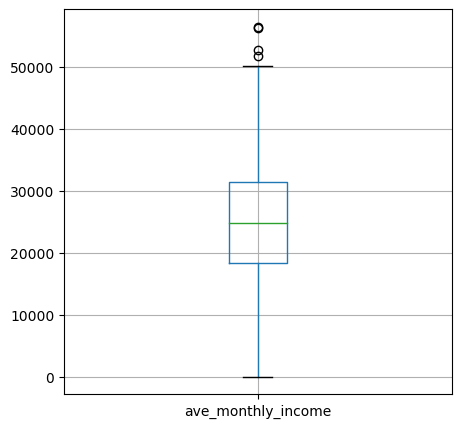

In [6]:
#Using the example of the ave_monthly_income variable, let's build a crib chart for better analysis of atypical data:
electricity[['ave_monthly_income']].boxplot(figsize=(5, 5));

We can see that while the 2nd and 3rd quartiles of ave_monthly_income look quite realistic, the 1st quartile does not. In my opinion, you need to have a minimum of UAH 2000 to pay for electricity and not be considered a false positive. The maximum value is possible. Let's adjust the data: 

In [7]:
# Delete rows where ave_monthly_income is less than 2000
electricity = electricity[(electricity['ave_monthly_income'] >= 2000)]

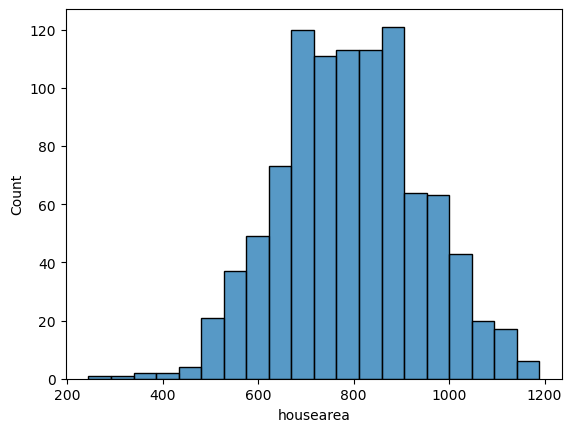

In [8]:
# Let's split several columns:
sns.histplot(electricity['housearea'], bins=20)
plt.show()


As we can see, the largest number of dwellings is between 700 and 900 

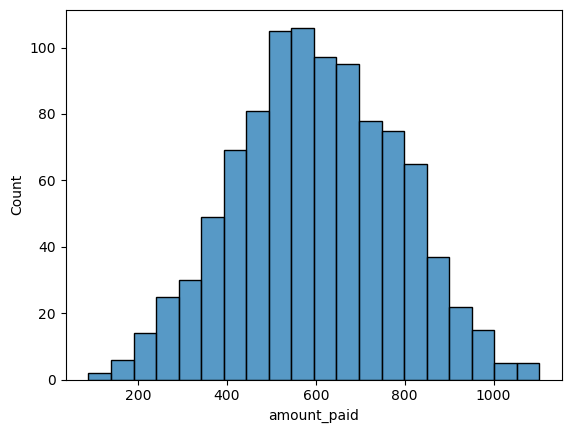

In [9]:
sns.histplot(electricity['amount_paid'], bins=20)
plt.show()

We can see that people pay between UAH 500 and 700 for electricity. 

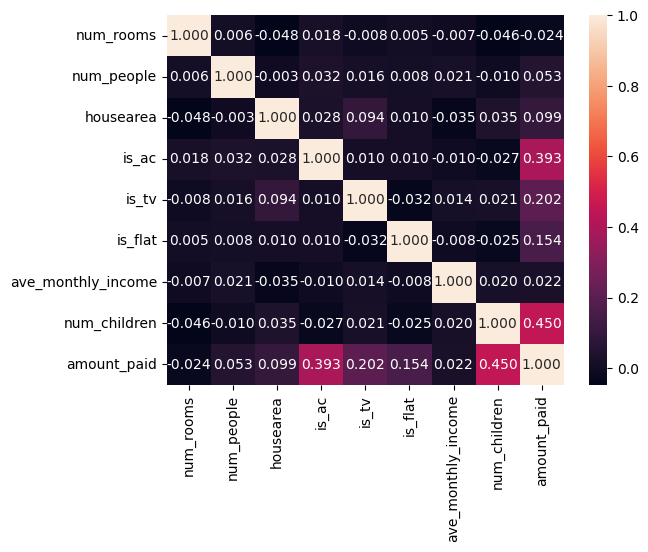

In [10]:
# Let's build a correlation matrix to see the linear relationship between the indicators.

# Create a correlation matrix
corr_matrix = electricity.corr()

# Displaying the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".3f")
plt.show()

Analysing the correlation matrix, we see that the highest correlation is between num_children and amount_paid (0.448). There is a good correlation between amount_paid and is_ac: 0.39. As for the interactions between the other columns (except for amount_paid), we see that there are no dependencies. This is quite good, because when building a linear regression, we will not be disturbed by multicollinearity.

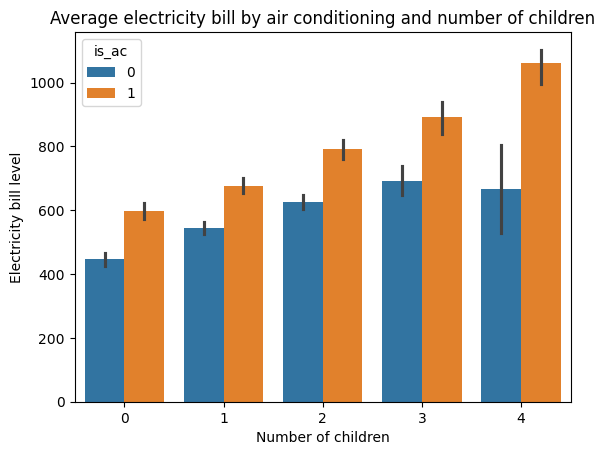

In [11]:
# Create a bar chart that shows the average electricity bill for each category of number of children and air conditioning:

# Create a column chart

sns.barplot(x='num_children', y='amount_paid', hue='is_ac', data=electricity)
plt.title('Average electricity bill by air conditioning and number of children')
plt.xlabel('Number of children')
plt.ylabel('Electricity bill level')
plt.show()

We can see that, depending on the number of children, the fee for electricity increases. And the factor of having air conditioning increases the fee even more.


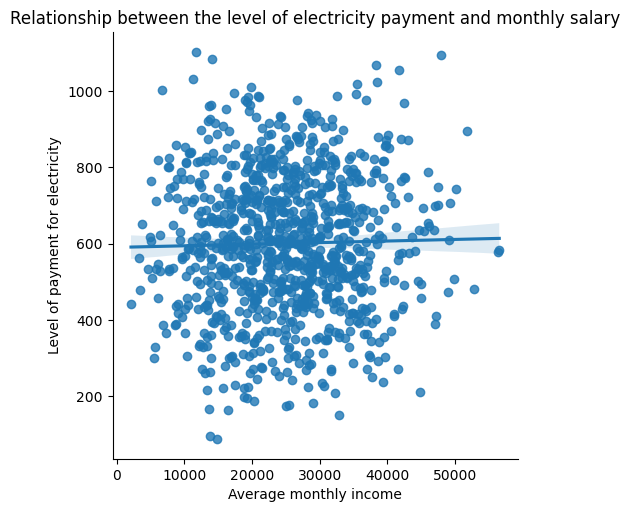

In [12]:
#Let's try to visualise the relationship between average monthly income and electricity bills:

# Create a linear regression model
sns.lmplot(x='ave_monthly_income', y='amount_paid', data=electricity)
plt.title('Relationship between the level of electricity payment and monthly salary')
plt.xlabel('Average monthly income')
plt.ylabel('Level of payment for electricity')
plt.show()

As you can see, there is no dependence. The level of average monthly income does not affect the level of electricity bills.

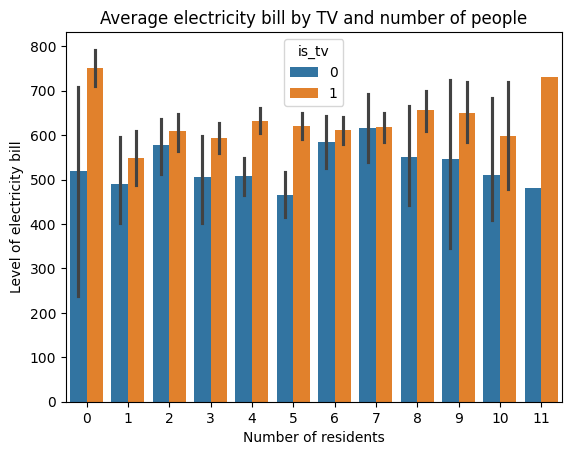

In [13]:
# Similar to the relationship between the number of children and the availability of air conditioning to the level of electricity bills.
# Let's build a bar chart that analyses the relationship between the number of residents and the presence of a TV to the level of electricity payment:

sns.barplot(x='num_people', y='amount_paid', hue='is_tv', data=electricity)
plt.title('Average electricity bill by TV and number of people')
plt.xlabel('Number of residents')
plt.ylabel('Level of electricity bill')
plt.show()

As you can see, the number of residents does not affect the level of payment, but the TV does, and increases this level if it is available.

### 4. Recode categorical features into numerical ones

Since the only categorical variable is is_urban, we recode it with pd.get_dummies(), setting drop_first=True:


In [14]:
electricity2 = pd.get_dummies(electricity, columns = ["is_urban"], drop_first=True)

Text(4.944444444444445, 0.5, 'Electricity payment level')

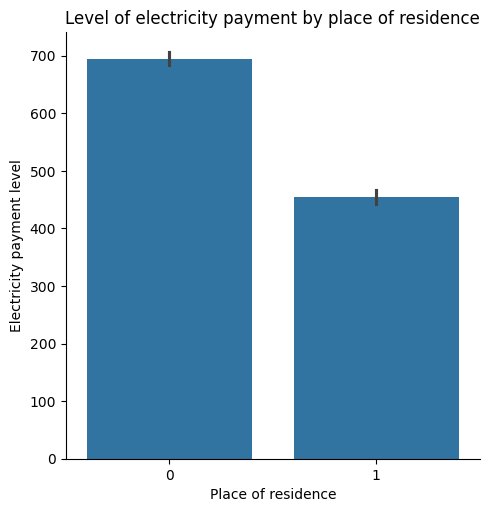

In [15]:
# Let's try to visualise the relationship between amount_paid and is_urban_urban:

sns.catplot(x='is_urban_urban', y='amount_paid', kind='bar', data=electricity2)
plt.title('Level of electricity payment by place of residence')
plt.xlabel('Place of residence')
plt.ylabel('Electricity payment level')

As you can see, there is a dependence. If the house is located in the village, they pay more. 

### 5. Let's estimate the parameters of an ordinary linear regression using the Sklearn library

In [16]:
# Create a matrix of independent variables and a vector of the dependent variable
X = electricity2.drop('amount_paid', axis=1)
y = electricity2.amount_paid

In [17]:
# Convert X and Y to numpy arrays.
X_np = np.array(X)
print(X_np.shape)

y_np = np.array(y).reshape(-1,1)
print(y_np.shape)

(981, 9)
(981, 1)


In [18]:
#Divide the data into training and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size = 0.3, random_state=111)

In [19]:
#Let's build a linear regression
from sklearn.linear_model import LinearRegression
# Method for estimating the regression
linear_reg = LinearRegression()

# Estimating the regression on the training sample
linear_reg.fit(X_train,y_train)

LinearRegression()

In [20]:
# Evaluate the quality of the model on the training and test samples using R^2 and RMSE
# import the necessary metrics from the sklearn library
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

# prediction of the dependent variable on the training and test samples
y_pred_train = linear_reg.predict(X_train)
y_pred = linear_reg.predict(X_test)

# calculate R^2 on the training and test samples
print('R^2 train: {:.3f}'.format(r2_score(y_train, y_pred_train)))
print('R^2 test: {:.3f}'.format(r2_score(y_test, y_pred)))

# calculate the RMSE on the training and test samples
rmse_train = MSE(y_train,y_pred_train, squared=False)
rmse_test = MSE(y_test,y_pred, squared=False)

print('Root Mean Squared Error train: {:.3f}'.format(rmse_train))
print('Root Mean Squared Error test: {:.3f}'.format(rmse_test))

R^2 train: 0.870
R^2 test: 0.899
Root Mean Squared Error train: 63.939
Root Mean Squared Error test: 60.516


Analysing the R^2, we can say that the linear regression explains about 87-90% of the electricity bill, which is a pretty good result.
The RMSE is used to compare the models further.

### 6. Using the GridSearch, we will select the best regularisation parameters and estimate the model with the best parameters

Let's try to apply linear regression regularisation to improve the model. To do this, we will first use ElasticNet with arbitrary values of alpha and l1_ratio (0.5 both)

In [21]:
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha= 0.5, l1_ratio=0.5)
en.fit(X_train, y_train)

y_pred_train = en.predict(X_train)
y_test_pred = en.predict(X_test)


print('R^2 train: {:.3f}'.format(r2_score(y_train, y_pred_train)))
print('R^2 test: {:.3f}'.format(r2_score(y_test, y_test_pred)))

rmse_train = MSE(y_train, y_pred_train, squared=False)
rmse_test = MSE(y_test, y_test_pred, squared=False)

print('Root Mean Squared Error train: {:.3f}'.format(rmse_train))
print('Root Mean Squared Error test: {:.3f}'.format(rmse_test))

R^2 train: 0.670
R^2 test: 0.663
Root Mean Squared Error train: 101.825
Root Mean Squared Error test: 110.387


As can be seen, the ElasticNet regression performs much worse than the simple regression and explains only 66-67% of the electricity bill level. However, the R^2 test is lower than the R^2 train, and the difference between them has decreased, which indicates that the model is simplified.

#### Let's use GridSearchCV to determine the best regularisation parameters.

In [22]:
from sklearn.model_selection import GridSearchCV

#method of model evaluation (in this case, ElasticNet)
el_net = ElasticNet()

# set possible combinations of the values of the parameters a and l1_ratio
en_grid = {'alpha': np.linspace(0,1,50),
          'l1_ratio': np.linspace(0,1,50)}

grid = GridSearchCV(estimator=el_net,
                      param_grid=en_grid,
                      scoring='neg_mean_squared_error',
                       cv=5, # cross-validation will be carried out 5 times
                       n_jobs=-1) 

#### Evaluate the best model (based on GridSearch)

In [23]:
grid_result = grid.fit(X_train, y_train)

model_best = grid_result.best_estimator_
print(model_best)

y_pred_best_train = model_best.predict(X_train)
y_pred_best = model_best.predict(X_test)


print('R^2 train: {:.3f}'.format(r2_score(y_train, y_pred_best_train)))
print('R^2 test: {:.3f}'.format(r2_score(y_test, y_pred_best)))

rmse_train = MSE(y_train,y_pred_best_train, squared=False)
rmse_test = MSE(y_test,y_pred_best, squared=False)

print('Root Mean Squared Error train: {:.3f}'.format(rmse_train))
print('Root Mean Squared Error test: {:.3f}'.format(rmse_test))

ElasticNet(alpha=0.14285714285714285, l1_ratio=1.0)
R^2 train: 0.870
R^2 test: 0.898
Root Mean Squared Error train: 63.943
Root Mean Squared Error test: 60.611


The indicators of the simple model are compared: 
1. R^2 train: 0.870
2. R^2 test: 0.899
3. Root Mean Squared Error train: 63.939
4. Root Mean Squared Error test: 60.516

As we can see, l1_ratio=1.0, which indicates that the Ridge regression was completely missed. Unfortunately, all the indicators of the improved model are worse than the simple model, and hence the improvement is unnecessary. 

### 7.Let's predict the amount of electricity bills for new subscribers (method .predict()).

In [24]:
# For forecasting, we use a simple model, as it best simulates the size of the account.

# loading data about new customers
new_customers = pd.read_csv('new_customers.csv')

# First, let's convert categorical features to numeric ones (is_urban)
new_customers2 = pd.get_dummies(new_customers, columns = ["is_urban"], drop_first=True)

In [25]:
# call the .predict() method to predict the size of bills
predicted_bills = linear_reg.predict(new_customers2)

# Add a new column to the table
new_customers2["predicted_bills"] = predicted_bills

In [26]:
# Projected electricity bills for new customers:
electricity.head(15)

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,urban,560.481447
1,1,5,952.99,0,1,0,35064.79,1,rural,633.283679
2,3,1,761.44,1,1,1,22292.44,0,urban,511.879157
3,0,5,861.32,1,1,0,12139.08,0,urban,332.992035
4,1,8,731.61,0,1,0,17230.10,2,rural,658.285625
5,0,5,837.24,0,1,1,24661.81,2,rural,793.242346
6,4,5,679.04,0,1,0,28184.43,1,rural,570.382845
7,3,4,1044.65,0,0,1,16912.69,2,rural,585.405200
8,2,4,713.90,1,0,0,26058.28,0,rural,653.200868
9,1,6,734.43,0,0,0,22545.50,2,rural,606.015138


So, we used the model we created to predict the amount of electricity bills for new subscribers. We can see that the highest amount will be paid by the 5th subscriber (793), and the lowest by the 10th (222).